<a href="https://colab.research.google.com/github/DIFACQUIM/De-Novo_DNMT1/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis(PCA)


---
Code from: https://github.com/DIFACQUIM/Cursos/blob/main/6_2_Espacio_Qu%C3%ADmico_PCA.ipynb

In [159]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sys import argv

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
#De novo compounds
df=pd.read_csv("https://raw.githubusercontent.com/DIFACQUIM/De-Novo_DNMT1/main/alvaBuilder/Alva2023_5575.csv", delimiter=",")
print(df.shape)
df.head(2)

(5575, 9)


,SMILES,DATABASE,ID,PROGRAM,FRAGMENTS,DATASET,PROGRAM_SCORE,SMILES_chiral,SMILES_no_chiral
0,OCCCNC(=O)c1cc(nc2cc(n[n]12)C(F)(F)F)-c1ccco1,AB_CDDNMT,ABCDT01_01,AlvaBuilder,ChemDiv DNMT,AB_CDDNMT01,1,O=C(NCCCO)c1cc(-c2ccco2)nc2cc(C(F)(F)F)nn12,O=C(NCCCO)c1cc(-c2ccco2)nc2cc(C(F)(F)F)nn12
1,CC(O)C(=O)OCN=C1NC(=Nc2ccccc12)c1cc(ccc1Br)OC(...,AB_CDDNMT,ABCDT01_02,AlvaBuilder,ChemDiv DNMT,AB_CDDNMT01,1,CC(=O)C(O)OCN=c1[nH]c(-c2cc(OC(=O)O)ccc2Br)nc2...,CC(=O)C(O)OCN=c1[nH]c(-c2cc(OC(=O)O)ccc2Br)nc2...


In [162]:
#DNMT1 actives
DNMT=pd.read_csv("https://github.com/DIFACQUIM/De-Novo_DNMT1/raw/main/DNMT1_10micM_285_curated.csv", delimiter=",")
DNMT.head(2)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,NEW_SMILES
0,CHEMBL3087498,NaN,0,618.58,1,3.61,SGC0946,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4477246,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,NaN,NaN,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...
1,CHEMBL2171169,NaN,0,540.67,1,2.25,FED1,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4477246,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,NaN,NaN,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...


In [163]:
#Add Database column for identification
DNMT['DATABASE'] = "DNMT1"

In [164]:
#List columns of both dataframes
print(df.columns)
print(DNMT.columns)

Index(['SMILES', 'DATABASE', 'ID', 'PROGRAM', 'FRAGMENTS', 'DATASET',
       'PROGRAM_SCORE', 'SMILES_chiral', 'SMILES_no_chiral'],
      dtype='object')
Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Sou

In [165]:
# Select columns
df = df[['ID', 'SMILES_chiral', 'DATABASE']]
DNMT = DNMT[['Molecule ChEMBL ID', 'NEW_SMILES', 'DATABASE']]

# Change names
df.columns = ["ID", "SMILES", "DATABASE"]
DNMT.columns = ["ID", "SMILES", "DATABASE"]

#Concatenate
DATA = pd.concat([DNMT, df], sort=False)
print(DATA.shape)
DATA.head()

(5860, 3)


,ID,SMILES,DATABASE
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1
2,CHEMBL83747,O=C(NCCSSCCNC(=O)C(Cc1ccc(O)c(Br)c1)=NO)C(Cc1c...,DNMT1
3,CHEMBL4215326,COc1cc2c(=NC3CCN(C)CC3)cc(-c3ccc(C)o3)[nH]c2cc...,DNMT1
4,CHEMBL1201129,N=c1ncn(C2CC(O)C(CO)O2)c(=O)[nH]1,DNMT1


In [166]:
# SMILES example
smi = list(DATA["SMILES"])[15]
print(smi)

COc1cc2c(=NC3CCNCC3)cc(-c3ccc(C)o3)[nH]c2cc1OCCCN1CCCC1


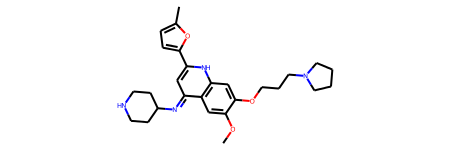

In [167]:
# Molecule from SMILES
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
mol = Chem.MolFromSmiles(smi)
mol

In [168]:
# Descriptors
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [169]:
DATA.head(2)

,ID,SMILES,DATABASE,HBA,HBD,RB,LogP,TPSA,MW
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,8,6,9,3.44527,151.52,618.577
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1,9,6,9,2.07777,164.41,540.669


In [ ]:
# Save data
#DeNovo = DATA[DATA['DATABASE'] != 'DNMT1']
#DeNovo
#DeNovo.to_csv("alvaBuilder_descriptors.csv", sep=",", index=False)

In [170]:
dataset = DATA[["DATABASE", "HBA", "HBD", "RB", "LogP", "TPSA", "MW"]]
dataset.head(2)

,DATABASE,HBA,HBD,RB,LogP,TPSA,MW
0,DNMT1,8,6,9,3.44527,151.52,618.577
1,DNMT1,9,6,9,2.07777,164.41,540.669


# PCA visualization

#### 1. Divide database

In [171]:
#Divide matrix
data = dataset.iloc[:,1:7].values # Select descriptors columns
label = dataset.iloc[:,0].values # Select labels

In [172]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5
0,8.0,6.0,9.0,3.44527,151.52,618.577
1,9.0,6.0,9.0,2.07777,164.41,540.669


In [173]:
# Normalization
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

#### 3. Train model

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_std)
pca_results

array([[ 5.45503491,  0.05145976],
       [ 5.4678629 ,  1.89200487],
       [ 7.17245119, -0.54046091],
       ...,
       [ 1.18507852,  2.3679872 ],
       [ 1.35646922, -0.71729802],
       [-0.07626703,  0.50025083]])

In [175]:
# Labels
label = DATA[["DATABASE", "ID", "SMILES"]]
label = label.to_numpy()

In [176]:
# Concatenate arrays
arr = np.concatenate((label, pca_results), axis = 1)
# New dataframe
pca_dataset = pd.DataFrame(data=arr, columns = ['DATABASE',"ID", "SMILES",'component1', 'component2'])
pca_dataset.head(2)

,DATABASE,ID,SMILES,component1,component2
0,DNMT1,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,5.455035,0.05146
1,DNMT1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,5.467863,1.892005


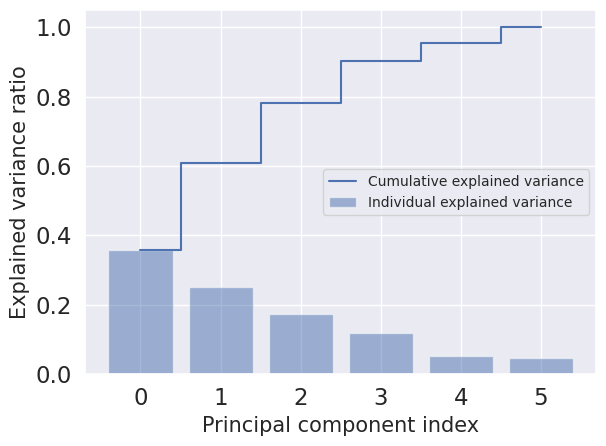

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
X_train_std = sc.transform(data)
#X_test_std = sc.transform(X_test)
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize=15)
plt.xlabel('Principal component index', fontsize=15)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

In [186]:
pca_dataset['DATABASE'].unique()

array(['DNMT1', 'AB_CDDNMT', 'AB_CDEPI', 'AB_CDSOL', 'AB_DNMT1',
       'AB_FOODB', 'AB_LCDIV', 'AB_LCEPI', 'AB_UNPDA'], dtype=object)

In [187]:
#Variance
exp_var_pca.round(3)

array([0.358, 0.252, 0.173, 0.119, 0.052, 0.046])

<Figure size 640x480 with 0 Axes>

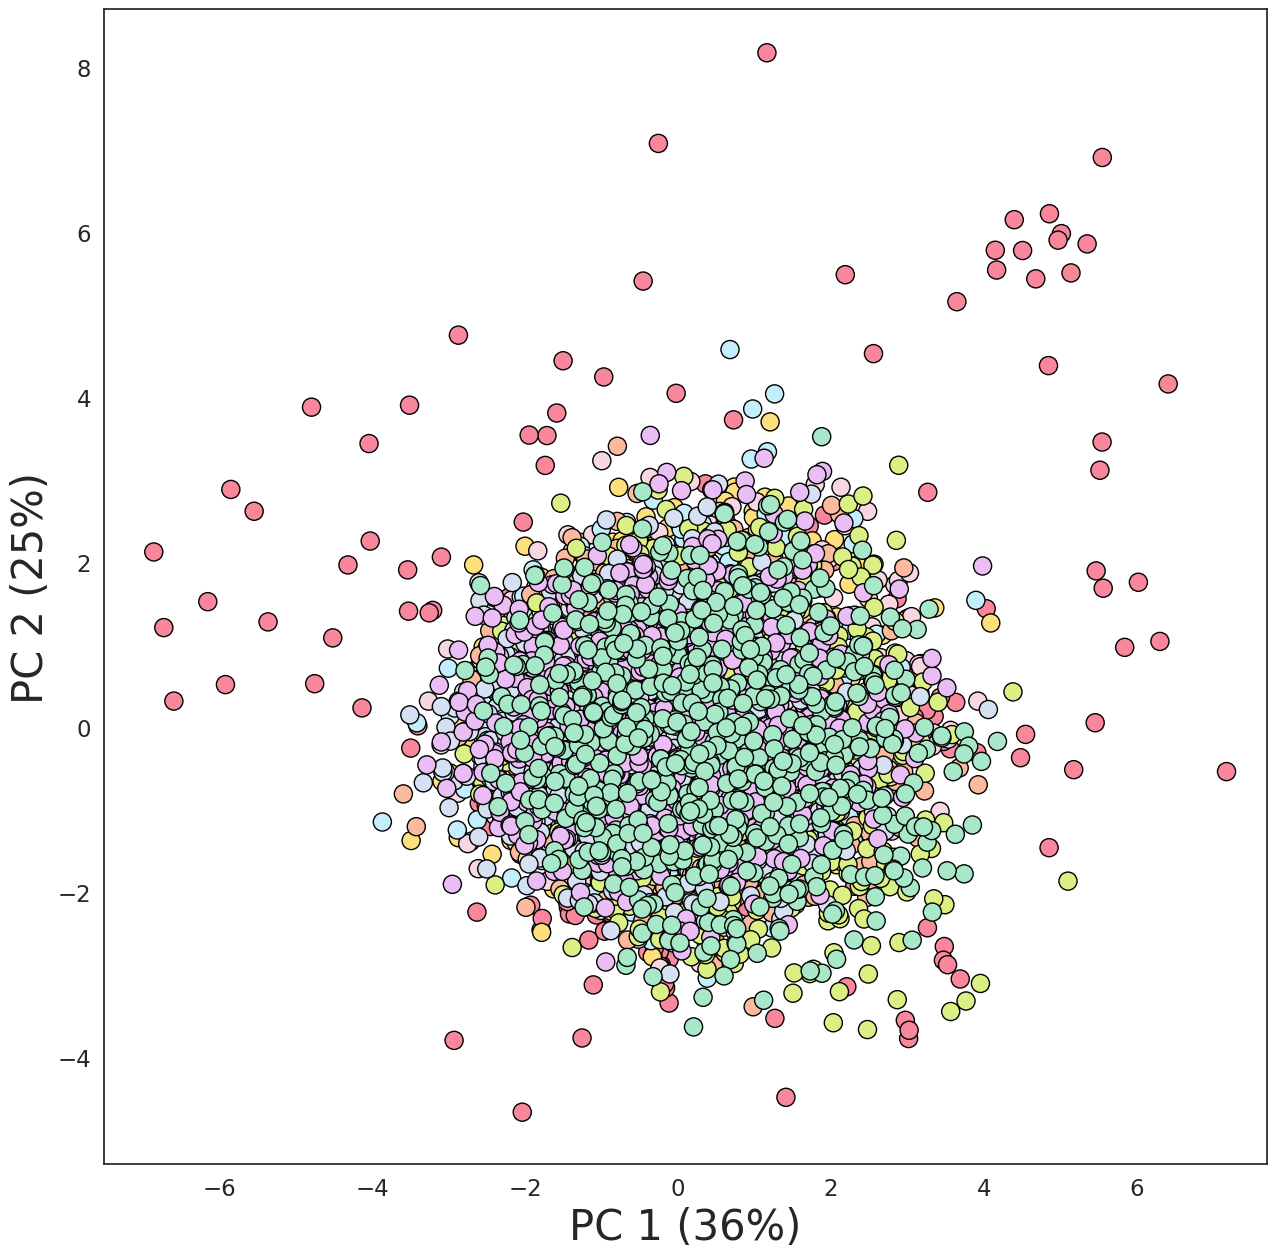

In [188]:
#Set white background
sns.set_style("white")

#Figure and font sizes
plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1 (36%)", fontsize=30)
plt.ylabel("PC 2 (25%)", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = pca_dataset["component1"],
                y = pca_dataset["component2"],
                hue = pca_dataset["DATABASE"], #Label
                palette=['#F8879B', '#FDDF7E', '#F7D7E2', '#C3EFFC', '#FBBA9E', '#DAF084', '#D5E0F2', '#EABDF4', '#A7E8C8'],
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

#plt.savefig('alva_PCA.png', bbox_inches = 'tight', dpi=400)

In [201]:
#Select one database
DNMT1 = pca_dataset[pca_dataset["DATABASE"].str.contains("DNMT1")]
CDDNMT = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_CDDNMT")]
CDEPI = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_CDEPI")]
CDSOL = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_CDSOL")]
ABDNMT = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_DNMT1")]
FOODB = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_FOODB")]
LCDIV = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_LCDIV")]
LCEPI = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_LCEPI")]
UNPDA = pca_dataset[pca_dataset["DATABASE"].str.contains("AB_UNPDA")]

<Figure size 640x480 with 0 Axes>

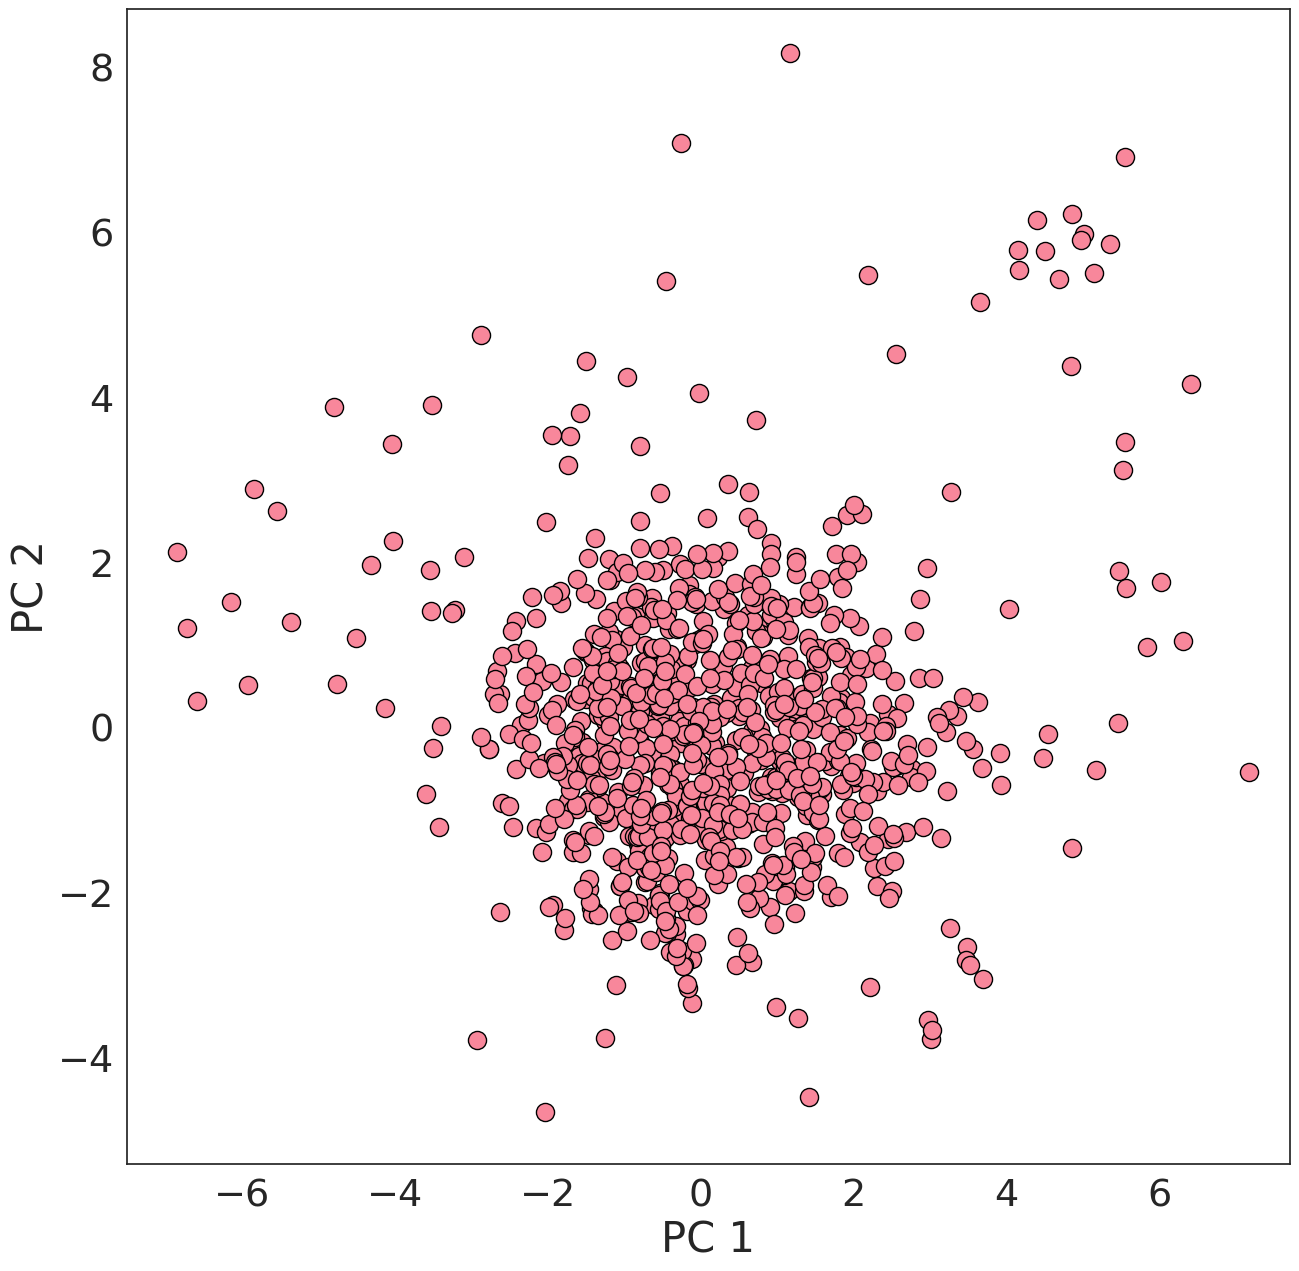

In [192]:
#Visualization for each database
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = DNMT1["component1"],
                y = DNMT1["component2"],
                color= '#F8879B',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA1.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

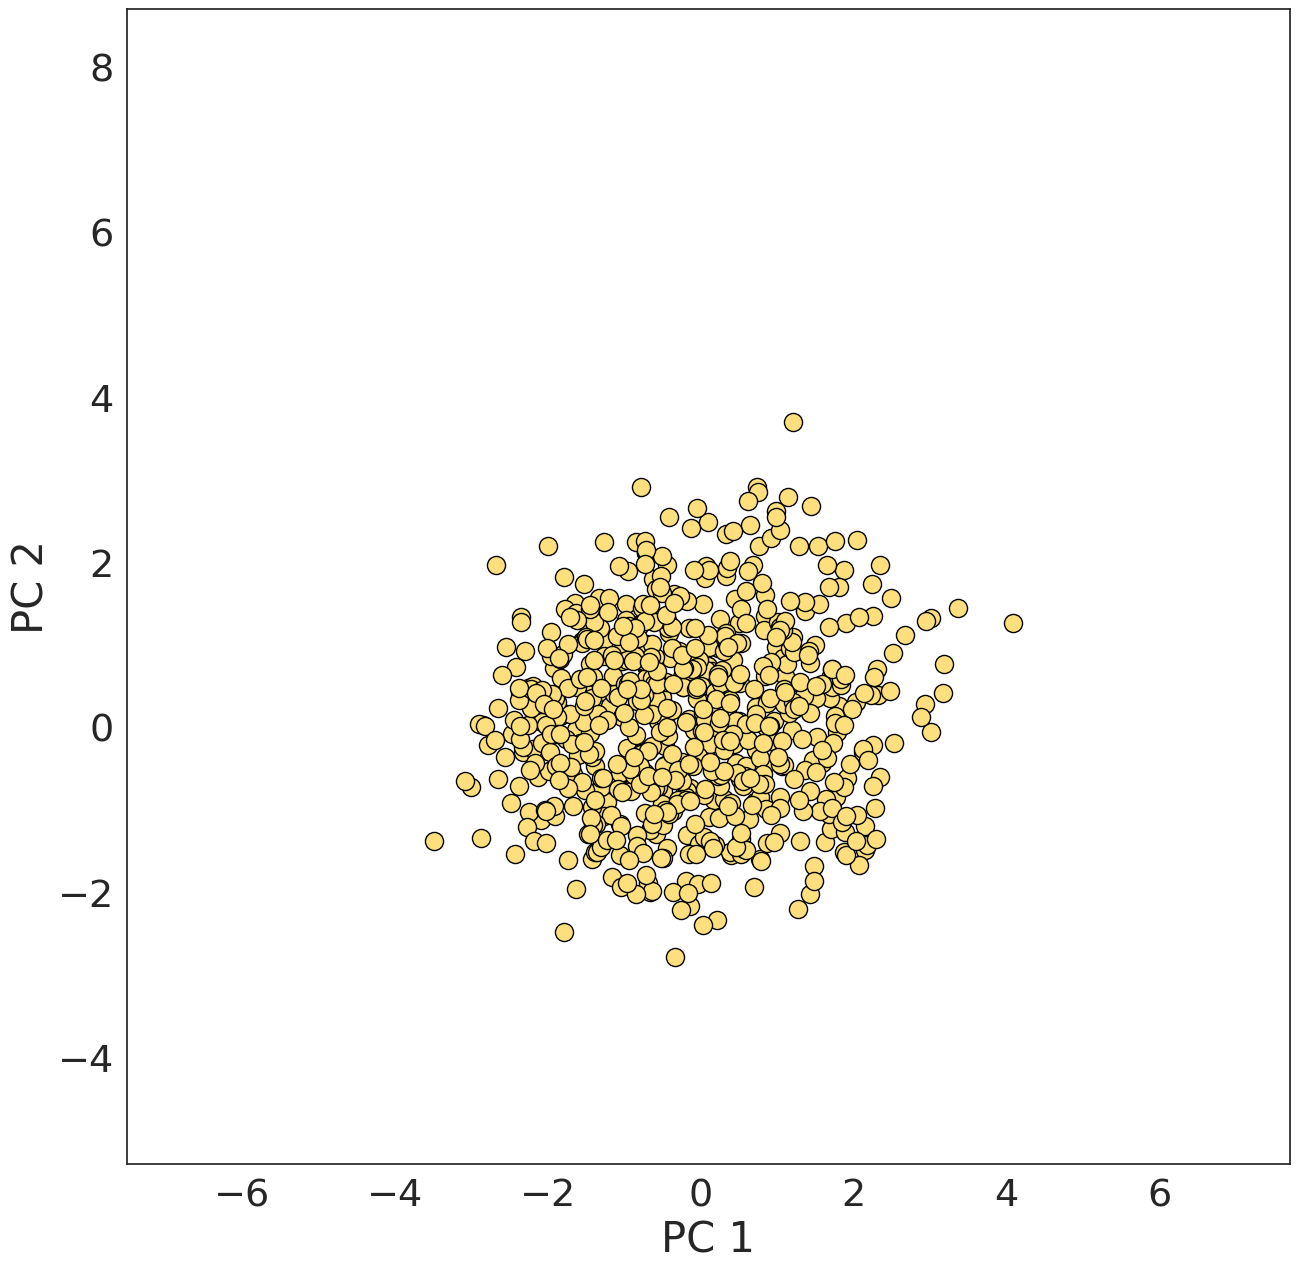

In [194]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = CDDNMT["component1"],
                y = CDDNMT["component2"],
                color= '#FDDF7E',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA2.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

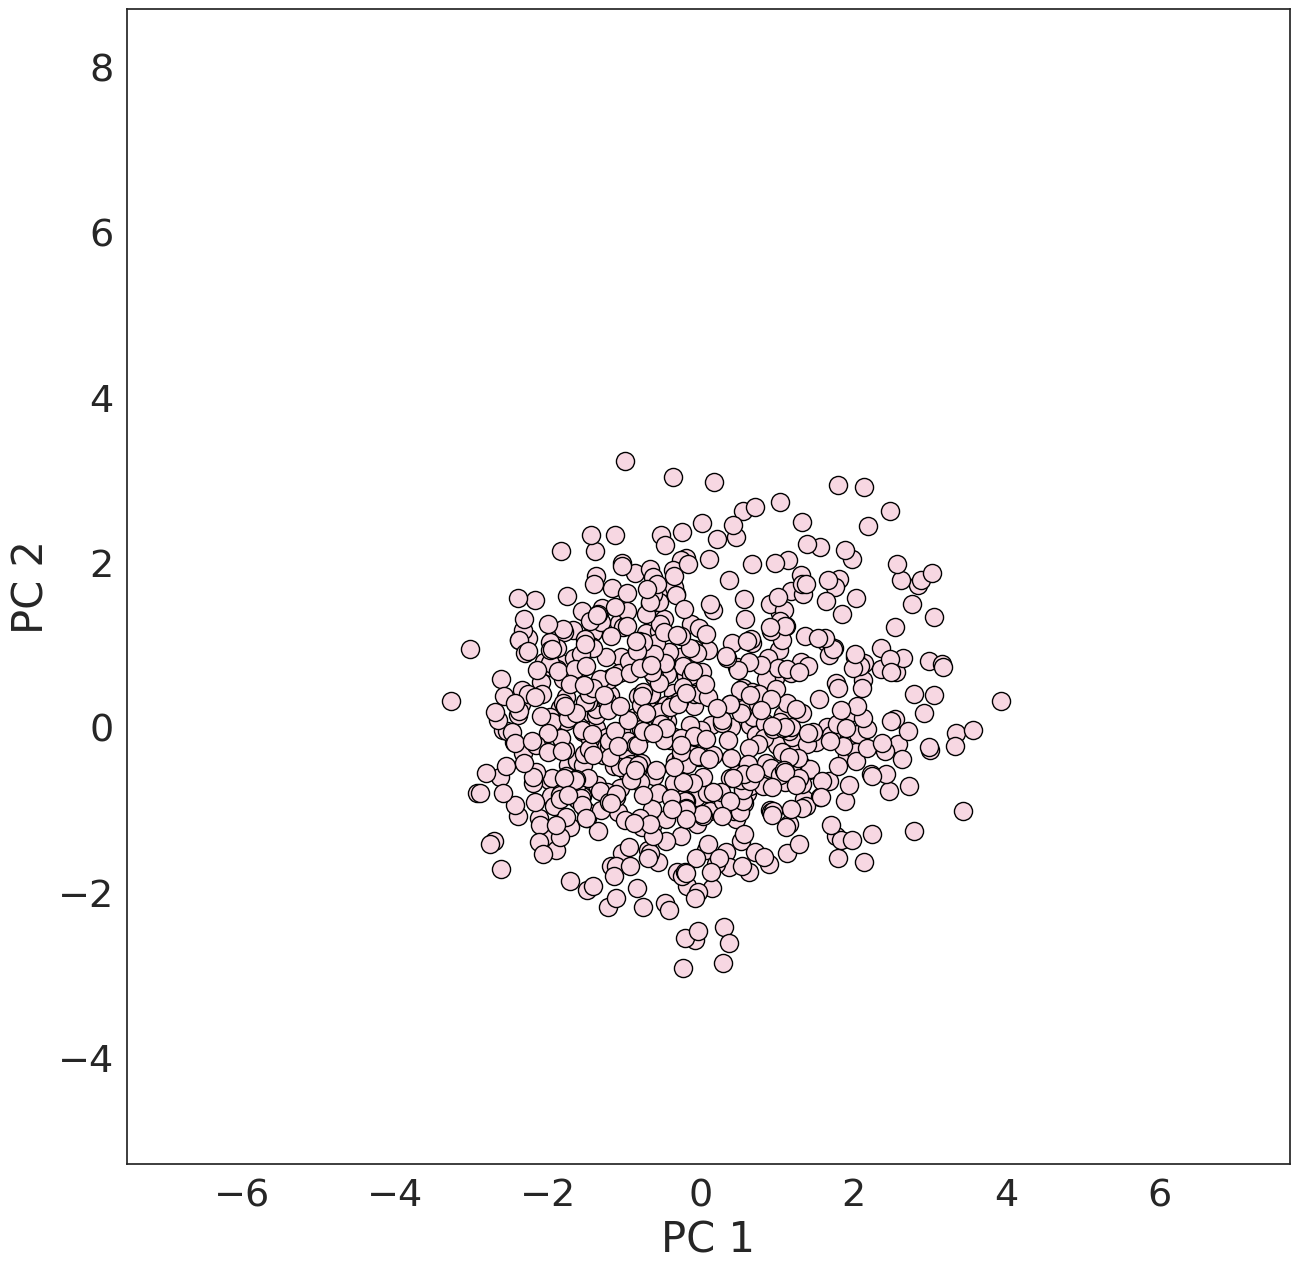

In [196]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = CDEPI["component1"],
                y = CDEPI["component2"],
                color= '#F7D7E2',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA3.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

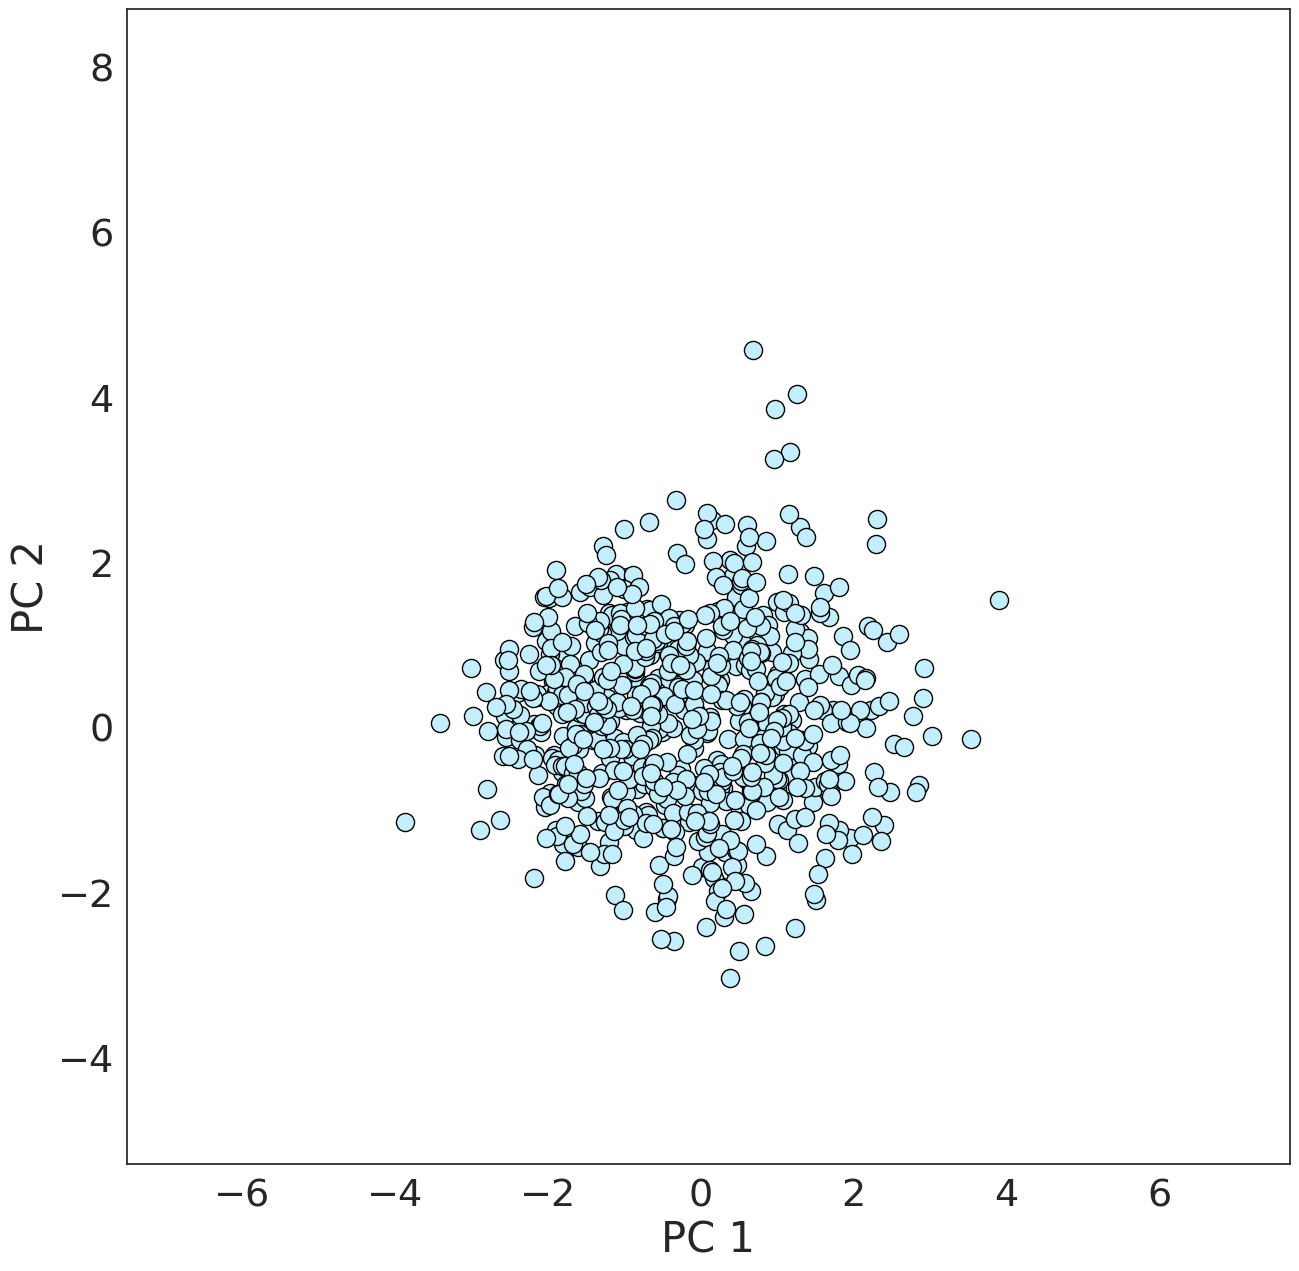

In [198]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = CDSOL["component1"],
                y = CDSOL["component2"],
                color= '#C3EFFC',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA4.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

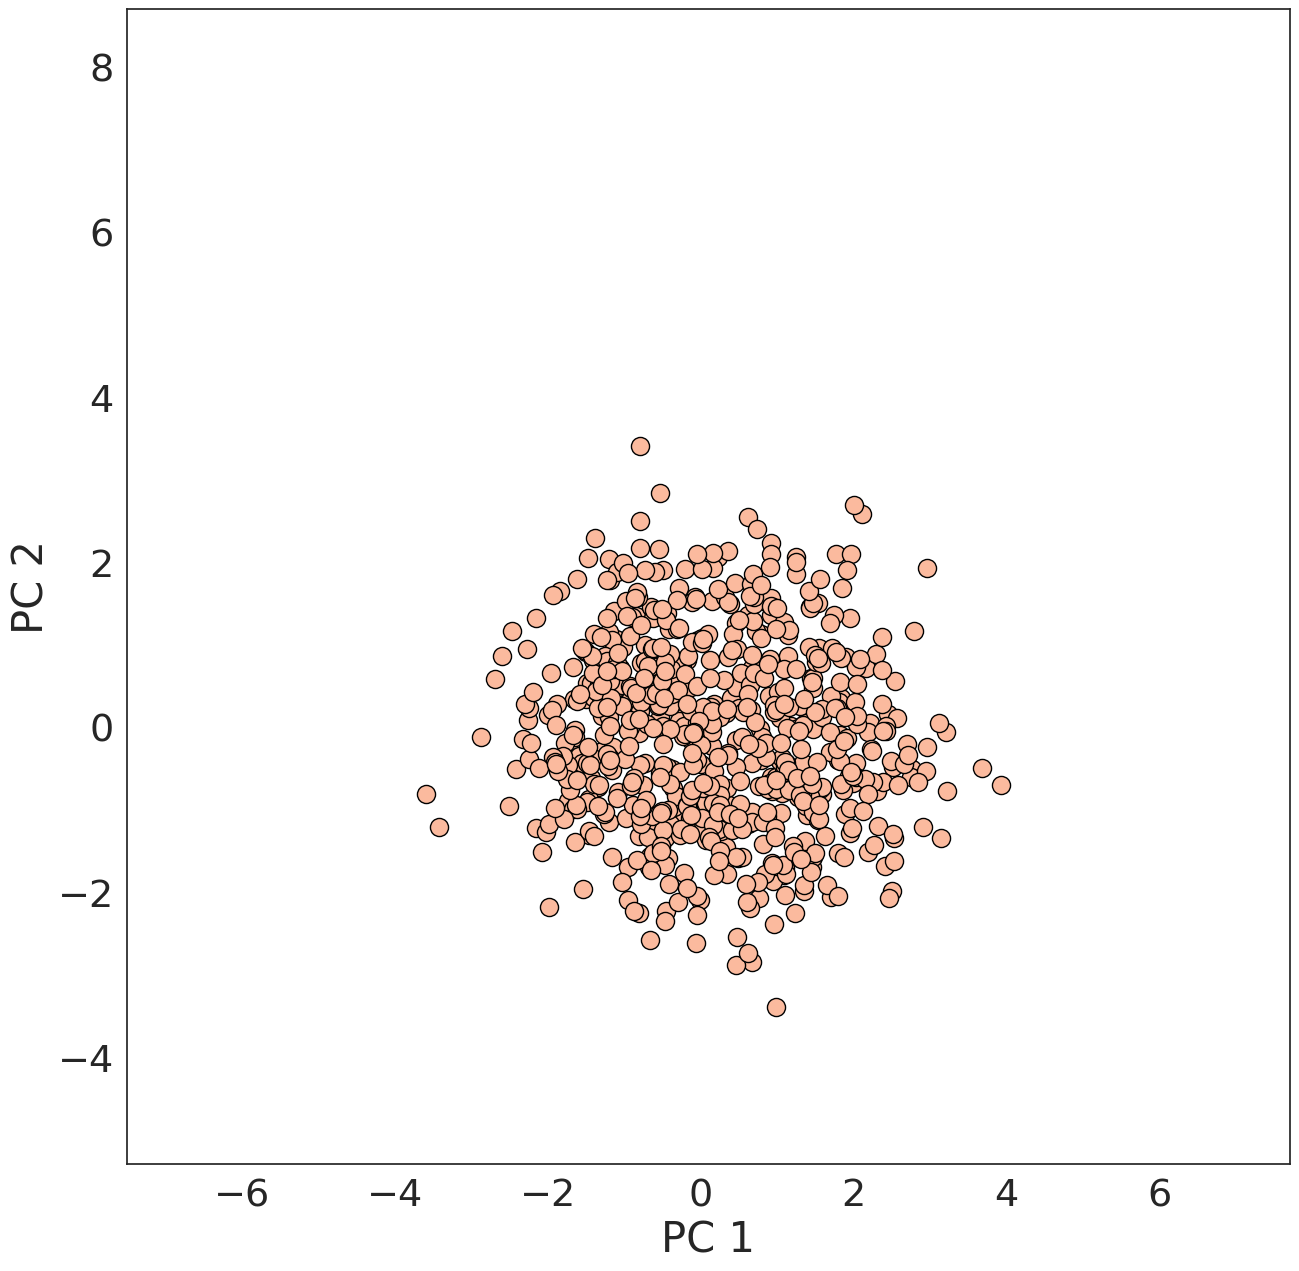

In [203]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = ABDNMT["component1"],
                y = ABDNMT["component2"],
                color= '#FBBA9E',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA5.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

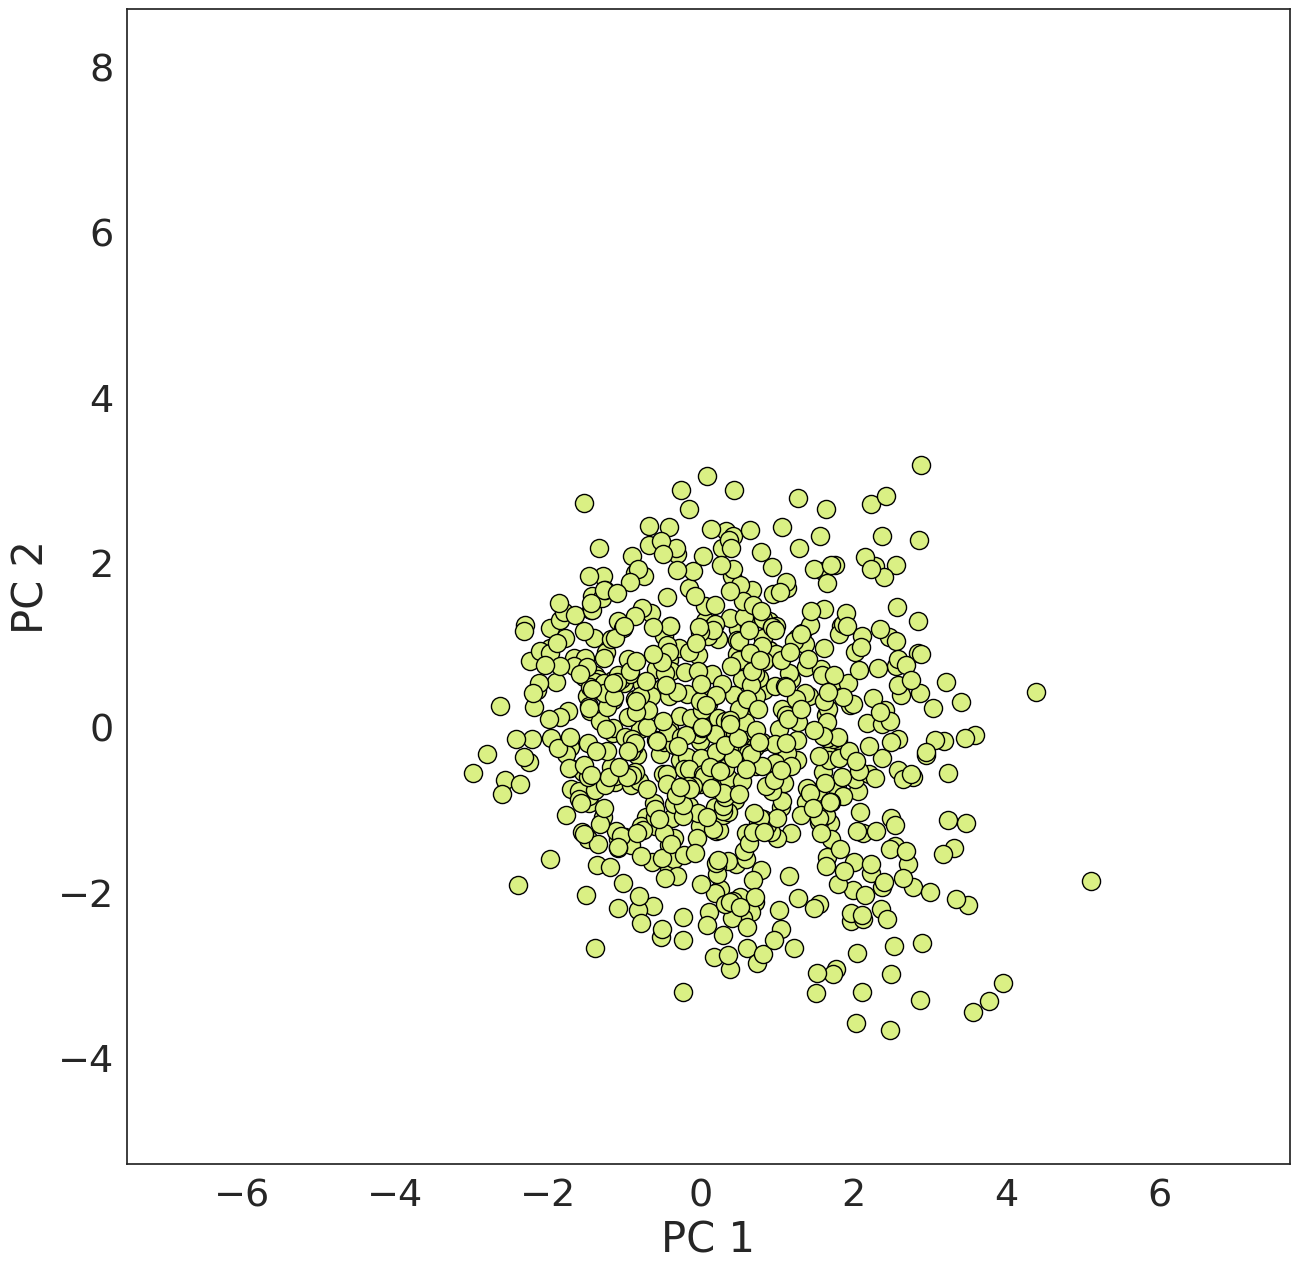

In [205]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = FOODB["component1"],
                y = FOODB["component2"],
                color= '#DAF084',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA6.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

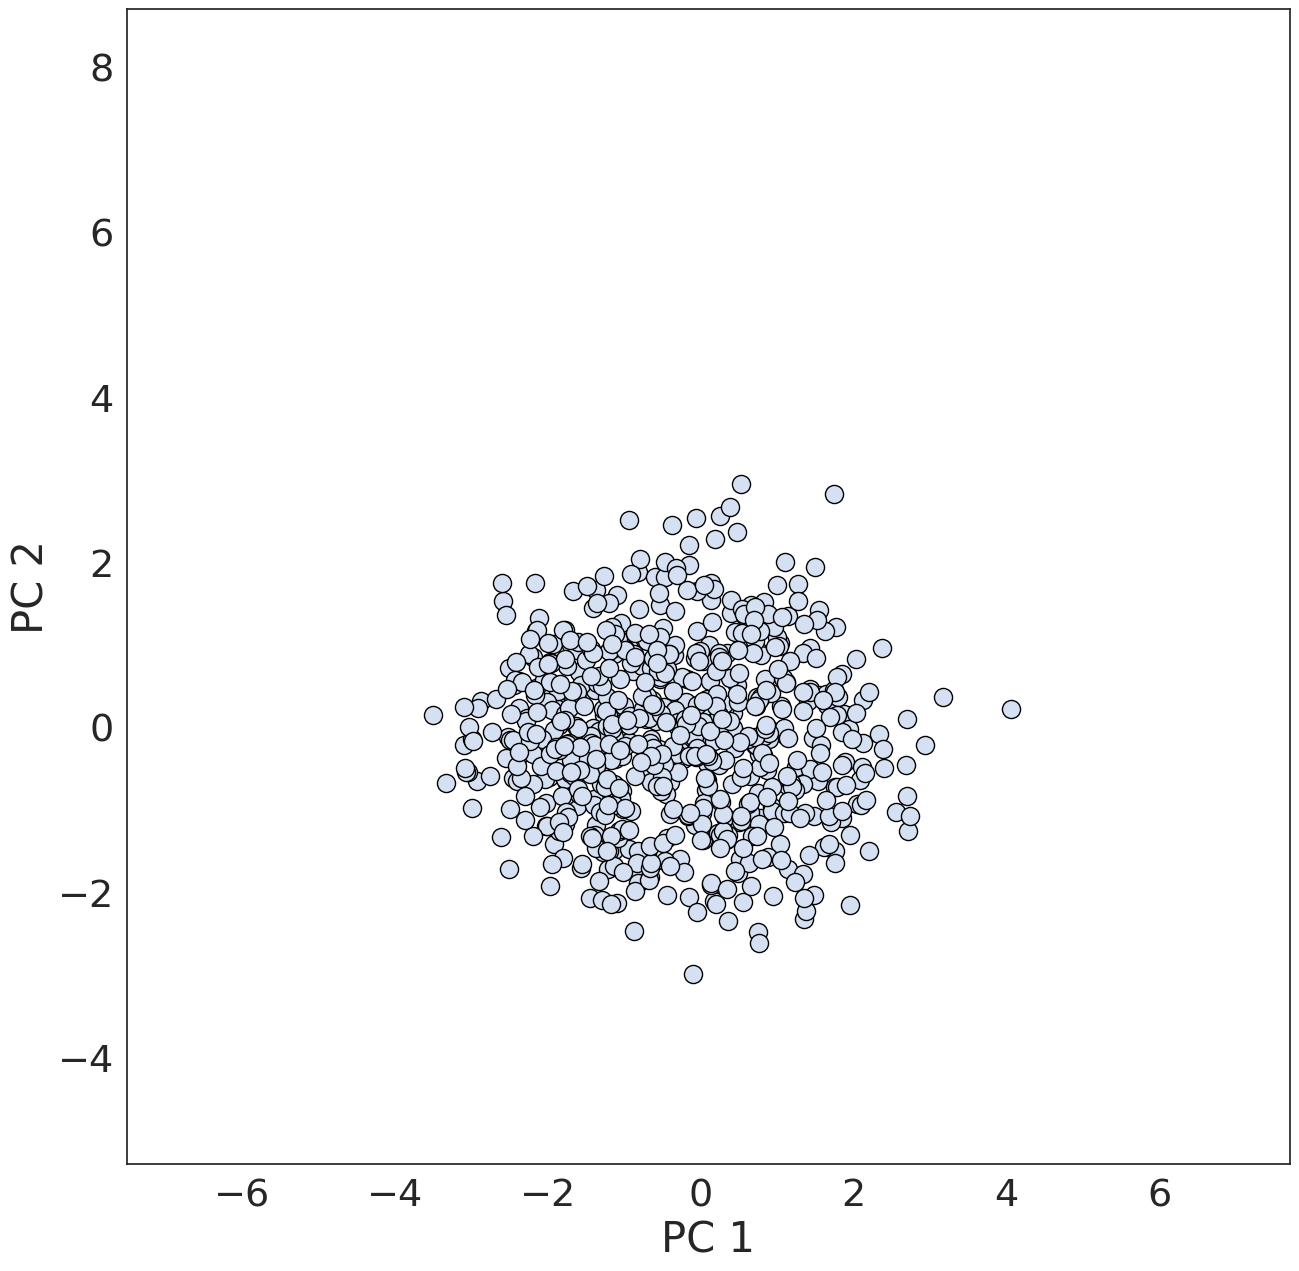

In [207]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = LCDIV["component1"],
                y = LCDIV["component2"],
                color= '#D5E0F2',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA7.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

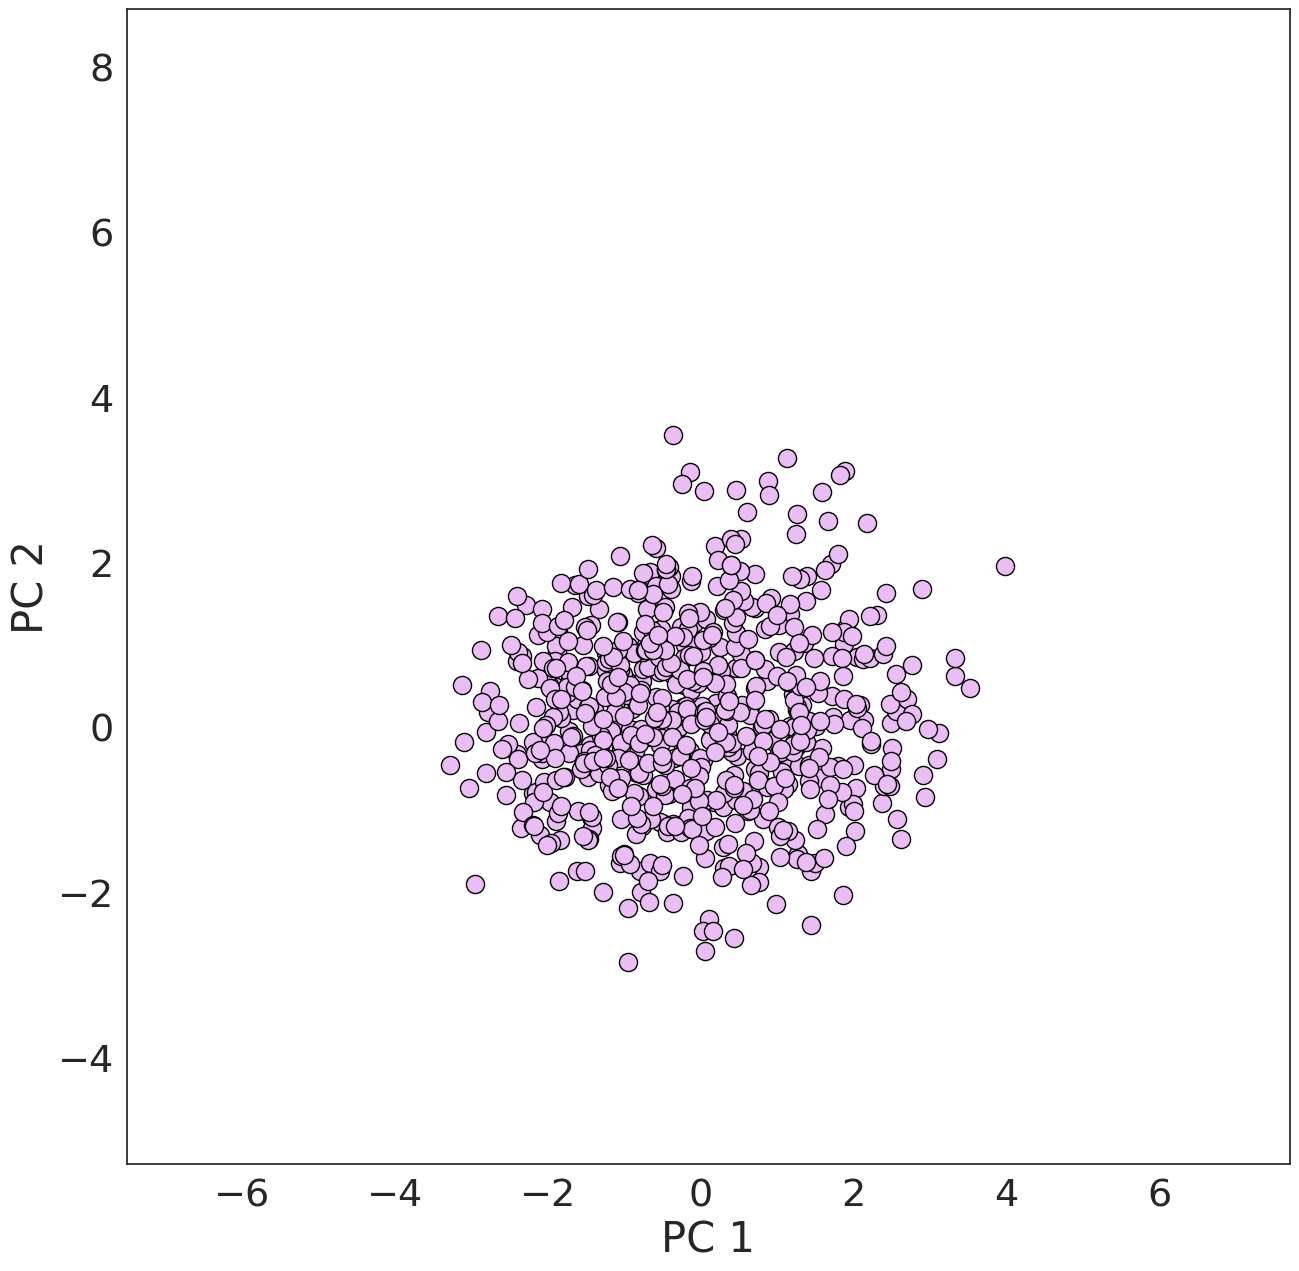

In [209]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = LCEPI["component1"],
                y = LCEPI["component2"],
                color= '#EABDF4',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA8.png', bbox_inches = 'tight', dpi=400)

<Figure size 640x480 with 0 Axes>

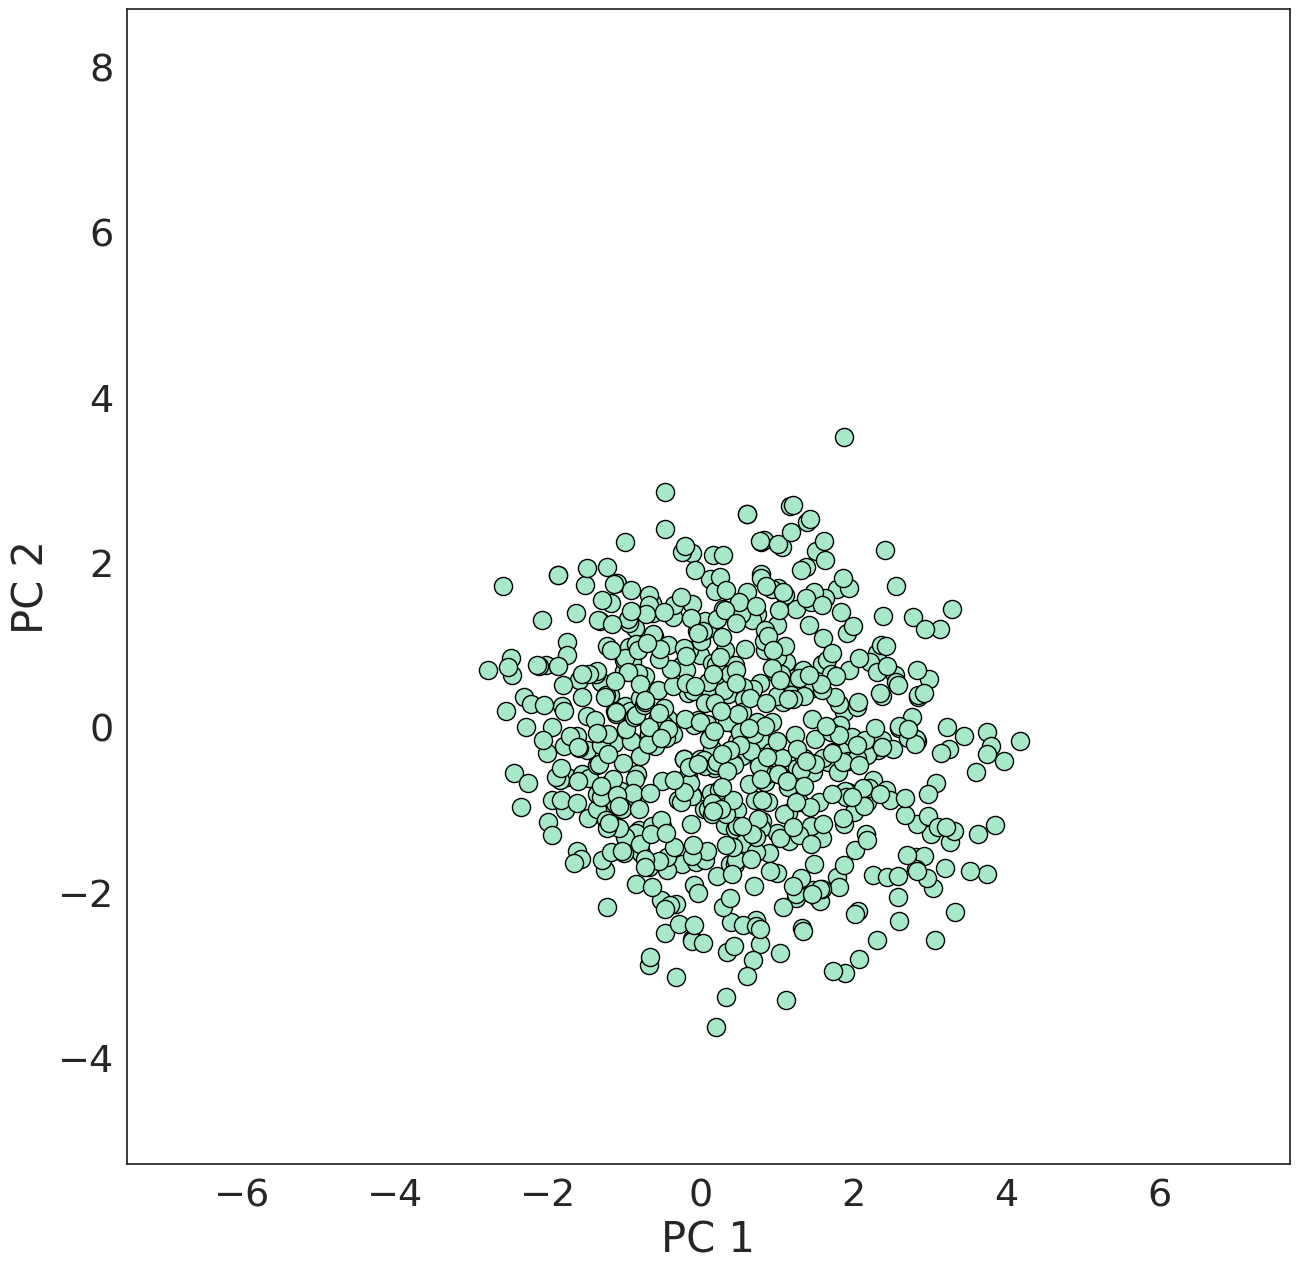

In [210]:
sns.set_style("white")

plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel("PC 1", fontsize=30)
plt.ylabel("PC 2", fontsize=30)
sns.set(font_scale=2.5)

#Scatterplot with selected palette
ax = sns.scatterplot(
                x = UNPDA["component1"],
                y = UNPDA["component2"],
                color= '#A7E8C8',
                edgecolor = 'black',
                linewidth = 1
                )

ax.set_xlim(-7.5, 7.7)
ax.set_ylim(-5.3, 8.7)
ax.collections[0].set_sizes([170])

plt.legend().remove()

plt.savefig('alva_PCA9.png', bbox_inches = 'tight', dpi=400)